<a href="https://colab.research.google.com/github/walukas1/DeepDiveDSProjects/blob/main/Project_3_SQL_1_Chinook_Walukas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL - Chinook


## Chinook data set

See the lecture on SQLite3 using the Chinook data set to set up the software, database, and tables, as well as for the links to ancillary information about the data set.


In [ ]:
import sqlite3 as db
import pandas as pd

In [ ]:
# Install the sqlite package for Ubuntu

%%capture
%%bash
apt-get update
apt-get install -y sqlite3

Download the Chinook sqlite database


In [ ]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip  # what is -l?

Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [ ]:
!unzip -u chinook.zip  #what is -u?

Archive:  chinook.zip


In [ ]:
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Feb 24 14:27 .
drwxr-xr-x 1 root root   4096 Feb 24 14:24 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Feb 24 14:27 chinook.zip
drwxr-xr-x 4 root root   4096 Feb 20 14:24 .config
drwxr-xr-x 1 root root   4096 Feb 20 14:24 sample_data


In [ ]:
# Get a list of the tables in the database
%%script sqlite3 --column --header chinook.db
.tables

albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [ ]:
# Show the schema for the entire database
%%script sqlite3 --column --header chinook.db
.schema


CREATE TABLE IF NOT EXISTS "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE sqlite_sequence(name,seq);
CREATE TABLE IF NOT EXISTS "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
);
CREATE TABLE IF NOT EXISTS "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON 

## Come up with questions about your data
Have a look at the Entity-Relation ( ER ) diagram to help come up with questions.

* What sort of information is in this dataset?
* How many records are there?
* How many different countries (states, counties, cities, etc) have records in this data set?


If you are stuck, here are some ideas for questions:
- https://github.com/LucasMcL/15-sql_queries_02-chinook/blob/master/README.md
- [Using the R language]( https://rpubs.com/enext777/636199 )
- [Search Google]( https://www.google.com/search?q=chinook+database+questions )



##ERD

![ERD-Notation[1].PNG](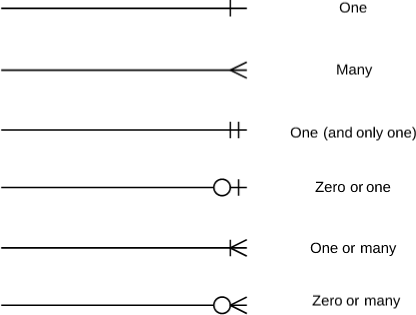)

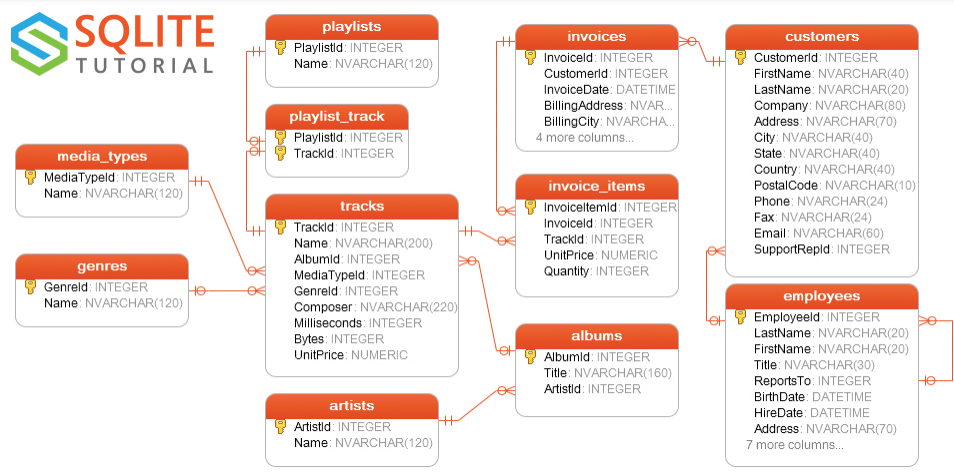

## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)


In [ ]:
%%script sqlite3 --column --header chinook.db
.table

albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


TRY LOOPING THIS

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT COUNT(1) AS artists FROM artists;
SELECT COUNT(1) AS tracks FROM tracks;
SELECT COUNT(1) AS albums FROM albums;
SELECT COUNT(1) AS playlists FROM playlists;
SELECT COUNT(1) AS customers FROM customers;
SELECT COUNT(1) AS media_types FROM media_types;
SELECT COUNT(1) AS invoices FROM invoices;

artists
-------
275    
tracks
------
3503  
albums
------
347   
playlists
---------
18       
customers
---------
59       
media_types
-----------
5          
invoices
--------
412     


### Basic Queries


#### SELECT (with * and with column names)


In [ ]:
# Who are the artists?
%%script sqlite3 --column --header chinook.db
select *
from artists

ArtistId  Name                                                                                 
--------  -------------------------------------------------------------------------------------
1         AC/DC                                                                                
2         Accept                                                                               
3         Aerosmith                                                                            
4         Alanis Morissette                                                                    
5         Alice In Chains                                                                      
6         Antônio Carlos Jobim                                                                 
7         Apocalyptica                                                                         
8         Audioslave                                                                           
9         BackBeat                      

In [ ]:
# Explain
%%script sqlite3 --column --header chinook.db
select *
from media_types

MediaTypeId  Name                       
-----------  ---------------------------
1            MPEG audio file            
2            Protected AAC audio file   
3            Protected MPEG-4 video file
4            Purchased AAC audio file   
5            AAC audio file             


#### WHERE


In [ ]:
#Where are there null values in invoices? Does each invoice have an assigned customer?
%%script sqlite3 --column --header chinook.db
SELECT *
FROM invoices
WHERE customerid IS NULL

In [ ]:
#Does each customer then have an invoice?
%%script sqlite3 --column --header chinook.db
SELECT *
FROM customers
WHERE customerid IS NULL

In [ ]:
#Where are the short tracks? And how muh do they cost?
%%script sqlite3 --column --header chinook.db
SELECT trackid, name, UnitPrice,
  ROUND(UnitPrice*1000/(Milliseconds),2) AS Price_Per_Second,
  Milliseconds/(1000) AS Seconds
FROM tracks
WHERE Seconds < 30
ORDER BY Seconds



TrackId  Name                      UnitPrice  Price_Per_Second  Seconds
-------  ------------------------  ---------  ----------------  -------
2461     É Uma Partida De Futebol  0.99       0.92              1      
168      Now Sports                0.99       0.2               4      
170      A Statistic               0.99       0.16              6      
178      Oprah                     0.99       0.15              6      
3304     Commercial 1              0.99       0.12              7      
172      The Real Problem          0.99       0.08              11     
3310     Commercial 2              0.99       0.05              21     
2241     Bossa                     0.99       0.03              29     


#### AND


In [ ]:
#Time and byte filter
%%script sqlite3 --column --header chinook.db
SELECT *
FROM tracks
WHERE Bytes > 1000
AND Milliseconds < 10000

TrackId  Name                      AlbumId  MediaTypeId  GenreId  Composer     Milliseconds  Bytes   UnitPrice
-------  ------------------------  -------  -----------  -------  -----------  ------------  ------  ---------
168      Now Sports                18       1            4                     4884          161266  0.99     
170      A Statistic               18       1            4                     6373          211997  0.99     
178      Oprah                     18       1            4                     6635          224313  0.99     
2461     É Uma Partida De Futebol  200      1            1        Samuel Rosa  1071          38747   0.99     
3304     Commercial 1              258      1            17       L. Muggerud  7941          319888  0.99     


#### OR


In [ ]:
#Who are the customers in portuguese speaking areas?
%%script sqlite3 --column --header chinook.db
select *
FROM customers
WHERE country = 'Brazil' OR country = 'Portugal'

CustomerId  FirstName  LastName   Company                                           Address                                   City                 State  Country   PostalCode  Phone               Fax                 Email                          SupportRepId
----------  ---------  ---------  ------------------------------------------------  ----------------------------------------  -------------------  -----  --------  ----------  ------------------  ------------------  -----------------------------  ------------
1           Luís       Gonçalves  Embraer - Empresa Brasileira de Aeronáutica S.A.  Av. Brigadeiro Faria Lima, 2170           São José dos Campos  SP     Brazil    12227-000   +55 (12) 3923-5555  +55 (12) 3923-5566  luisg@embraer.com.br           3           
10          Eduardo    Martins    Woodstock Discos                                  Rua Dr. Falcão Filho, 155                 São Paulo            SP     Brazil    01007-010   +55 (11) 3033-5446  +55 (11) 3033-4564  edua

#### LIKE (with % or _ wildcard)


In [ ]:
#Invoices from certain month and year
%%script sqlite3 --column --header chinook.db
SELECT InvoiceId, CustomerId, InvoiceDate, Total
FROM invoices
WHERE InvoiceDate LIKE '2010-06-%'

InvoiceId  CustomerId  InvoiceDate          Total
---------  ----------  -------------------  -----
119        56          2010-06-12 00:00:00  1.98 
120        58          2010-06-12 00:00:00  1.98 
121        1           2010-06-13 00:00:00  3.96 
122        5           2010-06-14 00:00:00  5.94 
123        11          2010-06-17 00:00:00  8.91 
124        20          2010-06-22 00:00:00  13.86
125        34          2010-06-30 00:00:00  0.99 


In [ ]:
#Invoices from certain month and year
%%script sqlite3 --column --header chinook.db
SELECT CustomerId, SUM(Total) AS Grand_Total
FROM invoices
GROUP BY CustomerId
ORDER BY Grand_Total DESC
LIMIT 5

CustomerId  Grand_Total
----------  -----------
6           49.62      
26          47.62      
57          46.62      
45          45.62      
46          45.62      


#### BETWEEN


In [ ]:
# Employees hired in a specific year
%%script sqlite3 --column --header chinook.db
SELECT *
FROM employees
WHERE HireDate+0 BETWEEN 2003 AND 2004

EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address                      City        State  Country  PostalCode  Phone              Fax                Email                   
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  ---------------------------  ----------  -----  -------  ----------  -----------------  -----------------  ------------------------
4           Park      Margaret   Sales Support Agent  2          1947-09-19 00:00:00  2003-05-03 00:00:00  683 10 Street SW             Calgary     AB     Canada   T2P 5G3     +1 (403) 263-4423  +1 (403) 263-4289  margaret@chinookcorp.com
5           Johnson   Steve      Sales Support Agent  2          1965-03-03 00:00:00  2003-10-17 00:00:00  7727B 41 Ave                 Calgary     AB     Canada   T3B 1Y7     1 (780) 836-9987   1 (780) 836-9543   steve@chinookcorp.com   
6           Mitchell  Michael    IT Manager 

#### LIMIT



In [ ]:
#What does the invoices and invoice_items look like? .head()
%%script sqlite3 --column --header chinook.db
SELECT *
FROM Invoice_items, invoices
Limit 10

InvoiceLineId  InvoiceId  TrackId  UnitPrice  Quantity  InvoiceId  CustomerId  InvoiceDate          BillingAddress           BillingCity  BillingState  BillingCountry  BillingPostalCode  Total
-------------  ---------  -------  ---------  --------  ---------  ----------  -------------------  -----------------------  -----------  ------------  --------------  -----------------  -----
1              1          2        0.99       1         1          2           2009-01-01 00:00:00  Theodor-Heuss-Straße 34  Stuttgart                  Germany         70174              1.98 
1              1          2        0.99       1         2          4           2009-01-02 00:00:00  Ullevålsveien 14         Oslo                       Norway          0171               3.96 
1              1          2        0.99       1         3          8           2009-01-03 00:00:00  Grétrystraat 63          Brussels                   Belgium         1000               5.94 
1              1          2        

### Sorting and Grouping


#### ORDER BY


In [ ]:
#
%%script sqlite3 --column --header chinook.db
SELECT City, Country
FROM customers
ORDER BY Country, City

City                 Country       
-------------------  --------------
Buenos Aires         Argentina     
Sidney               Australia     
Vienne               Austria       
Brussels             Belgium       
Brasília             Brazil        
Rio de Janeiro       Brazil        
São José dos Campos  Brazil        
São Paulo            Brazil        
São Paulo            Brazil        
Edmonton             Canada        
Halifax              Canada        
Montréal             Canada        
Ottawa               Canada        
Toronto              Canada        
Vancouver            Canada        
Winnipeg             Canada        
Yellowknife          Canada        
Santiago             Chile         
Prague               Czech Republic
Prague               Czech Republic
Copenhagen           Denmark       
Helsinki             Finland       
Bordeaux             France        
Dijon                France        
Lyon                 France        
Paris                France 

#### DISTINCT


In [ ]:
# Where are customers from?
%%script sqlite3 --column --header chinook.db
select DISTINCT country
from customers

Country       
--------------
Brazil        
Germany       
Canada        
Norway        
Czech Republic
Austria       
Belgium       
Denmark       
USA           
Portugal      
France        
Finland       
Hungary       
Ireland       
Italy         
Netherlands   
Poland        
Spain         
Sweden        
United Kingdom
Australia     
Argentina     
Chile         
India         


#### GROUP BY



In [ ]:
#
%%script sqlite3 --column --header chinook.db
SELECT *
FROM tracks
GROUP BY MediaTypeId

TrackId  Name                                     AlbumId  MediaTypeId  GenreId  Composer                                   Milliseconds  Bytes      UnitPrice
-------  ---------------------------------------  -------  -----------  -------  -----------------------------------------  ------------  ---------  ---------
1        For Those About To Rock (We Salute You)  1        1            1        Angus Young, Malcolm Young, Brian Johnson  343719        11170334   0.99     
2        Balls to the Wall                        2        2            1                                                   342562        5510424    0.99     
2819     Battlestar Galactica: The Story So Far   226      3            18                                                  2622250       490750393  1.99     
3336     War Pigs                                 260      4            23                                                  234013        8052374    0.99     
3349     Amanda                               

### Aggregates


##MAX


In [ ]:
#Longest playlist?
%%script sqlite3 --column --header chinook.db
SELECT Name, albumid, MAX(Bytes)
FROM tracks

Name                     AlbumId  MAX(Bytes)
-----------------------  -------  ----------
Through a Looking Glass  229      1059546140


#### MIN


In [ ]:
#
%%script sqlite3 --column --header chinook.db
SELECT FirstName, LastName, min(BirthDate)
FROM employees

FirstName  LastName  min(BirthDate)     
---------  --------  -------------------
Margaret   Park      1947-09-19 00:00:00


#### SUM


In [ ]:
# ALL Sums of invoice items>> TOp 10 sum invoice items
%%script sqlite3 --column --header chinook.db
SELECT invoiceid, SUM(UnitPrice*Quantity) as Invoice_Total
FROM invoice_items
GROUP BY invoiceid HAVING (Invoice_Total > 10)
ORDER BY Invoice_Total DESC
LIMIT 10

InvoiceId  Invoice_Total
---------  -------------
404        25.86        
299        23.86        
96         21.86        
194        21.86        
201        18.86        
89         18.86        
88         17.91        
306        16.86        
313        16.86        
103        15.86        


#### AVG


In [ ]:
%%script sqlite3 --column --header chinook.db
select *
FROM tracks
LIMIT 2

TrackId  Name                                     AlbumId  MediaTypeId  GenreId  Composer                                   Milliseconds  Bytes     UnitPrice
-------  ---------------------------------------  -------  -----------  -------  -----------------------------------------  ------------  --------  ---------
1        For Those About To Rock (We Salute You)  1        1            1        Angus Young, Malcolm Young, Brian Johnson  343719        11170334  0.99     
2        Balls to the Wall                        2        2            1                                                   342562        5510424   0.99     


In [ ]:
#Where are the highest grossing tracks by size and time?
%%script sqlite3 --column --header chinook.db
SELECT trackid, name, UnitPrice, (Bytes/10000) AS size,
  UnitPrice/(Bytes/1000) AS Price_size_per_kB
FROM tracks
ORDER BY Price_size_per_kB DESC
LIMIT 10

TrackId  Name                      UnitPrice  size  Price_size_per_kB   
-------  ------------------------  ---------  ----  --------------------
2461     É Uma Partida De Futebol  0.99       3     0.0260526315789474  
168      Now Sports                0.99       16    0.00614906832298137 
170      A Statistic               0.99       21    0.00469194312796209 
178      Oprah                     0.99       22    0.00441964285714286 
3304     Commercial 1              0.99       31    0.00310344827586207 
172      The Real Problem          0.99       38    0.00255813953488372 
3310     Commercial 2              0.99       85    0.00116470588235294 
2241     Bossa                     0.99       96    0.00102378490175801 
1086     Casinha Feliz             0.99       103   0.00095283926852743 
975      Deixa Entrar              0.99       109   0.000904109589041096


In [ ]:
#Where are there null values in invoices? Does each invoice have an assigned customer?
%%script sqlite3 --column --header chinook.db
SELECT UnitPrice > AVG(UnitPrice)
FROM tracks

#### COUNT



In [ ]:
#How many customers are in each country?
%%script sqlite3 --column --header chinook.db
SELECT Country, COUNT(Country)
FROM customers
GROUP BY Country

## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM invoices
LIMIT 5

InvoiceId  CustomerId  InvoiceDate          BillingAddress           BillingCity  BillingState  BillingCountry  BillingPostalCode  Total
---------  ----------  -------------------  -----------------------  -----------  ------------  --------------  -----------------  -----
1          2           2009-01-01 00:00:00  Theodor-Heuss-Straße 34  Stuttgart                  Germany         70174              1.98 
2          4           2009-01-02 00:00:00  Ullevålsveien 14         Oslo                       Norway          0171               3.96 
3          8           2009-01-03 00:00:00  Grétrystraat 63          Brussels                   Belgium         1000               5.94 
4          14          2009-01-06 00:00:00  8210 111 ST NW           Edmonton     AB            Canada          T6G 2C7            8.91 
5          23          2009-01-11 00:00:00  69 Salem Street          Boston       MA            USA             2113               13.86


In [ ]:
#histogram of discrete and scatter plot of contiuous data
%%script sqlite3 --column --header chinook.db
CREATE TABLE Invoices_over_time
SELECT InvoiceDate, Total
FROM invoice_items

Error: near line 1: in prepare, near "SELECT": syntax error (1)


CalledProcessError: Command 'b'CREATE TABLE Invoices_over_time\nSELECT InvoiceDate, Total\nFROM invoice_items\n'' returned non-zero exit status 1.

## EXTRA CREDIT:
* Use a CTE
* Use a query that **joins** two or more tables.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data

SERIOUS DATA QUERY-ERS JOIN

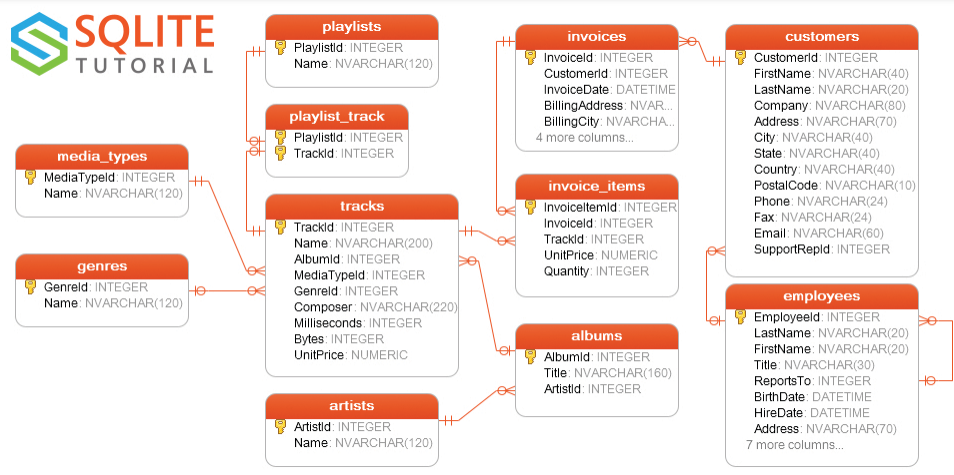

In [ ]:
# Example
# Select customers, their rep, and the rep's supervisor
## uses CTEs
%%script sqlite3 --column --header chinook.db

with
emp as (
  select EmployeeID, FirstName, Lastname, ReportsTo
  from employees
),
reps as (
  select EmployeeID, FirstName, Lastname, ReportsTo
  from emp
),
supervisors as (
  select EmployeeID, FirstName, Lastname
  from emp
)

select *
from supervisors
;

In [ ]:
#Invoice_items, invoices merge!
%%script sqlite3 --column --header chinook.db
SELECT *
FROM Invoice_items, invoices
Limit 10